# Grid World --- past all grids

In [1]:
import numpy as np

In [2]:
BOARD_ROWS = 3
BOARD_COLS = 3
START = (0, 0)
END = (0, 0)

In [3]:
class State:

    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.state = state    # tuple of the coordinate
        self.is_end = False

    def check_end(self):
        if self.state == END:
            self.is_end = True

    def next_position(self, action):
        if action == "up":
            next_state = (self.state[0] - 1, self.state[1])
        elif action == "down":
            next_state = (self.state[0] + 1, self.state[1])
        elif action == "left":
            next_state = (self.state[0], self.state[1] - 1)
        else:
            next_state = (self.state[0], self.state[1] + 1)
        if (next_state[0] >= 0) and (next_state[0] < BOARD_ROWS):
            if (next_state[1] >= 0) and (next_state[1] < BOARD_COLS):
                return next_state
        return self.state

In [4]:
class Agent:

    def __init__(self):
        self.actions = ["up", "down", "left", "right"]      # space
        self.State = State()
        self.is_end = self.State.is_end
        self.alpha = 0.3
        self.exp_rate = 1
        self.decay_gamma = 0.9
        self.Q_values = {}             # init Q values (dict)
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.Q_values[(i, j)] = {}
                for a in self.actions:
                    self.Q_values[(i, j)][a] = 0
        self.past_all = []
        for i in range(BOARD_ROWS):
            t = []
            for j in range(BOARD_COLS): 
                t.append(False)
            self.past_all.append(t)
        self.steps = []
    
    def optimal_action(self):
        max_value = -100
        action = ""
        for a in self.actions:
            next_value = self.Q_values[self.State.state][a]
            if next_value >= max_value:
                action = a
                max_value = next_value
        return action
    
    def get_action(self):
        if np.random.uniform(0, 1) <= self.exp_rate:
            up = self.State.next_position("up")
            down = self.State.next_position("down")
            left = self.State.next_position("left")
            right = self.State.next_position("right")
            rule = [self.past_all[up[0]][up[1]] is True,
                    self.past_all[down[0]][down[1]] is True,
                    self.past_all[left[0]][left[1]] is True,
                    self.past_all[right[0]][right[1]] is True ]
            if all(rule):
                action = np.random.choice(self.actions)
                return action
            else:
                while True:
                    action = np.random.choice(self.actions)
                    next_state = self.State.next_position(action)
                    if self.past_all[next_state[0]][next_state[1]] == False:
                        return action
                    else:
                        continue
        else:
            return self.optimal_action()
    
    def give_reward(self):
        reward = 0
        if self.past_all[self.State.state[0]][self.State.state[1]] is False:
            reward += 1
        else:
            reward -= .1
        return reward
    
    def set_action(self, action):
        curr_state = self.State.state
        self.past_all[curr_state[0]][curr_state[1]] = True
        next_state = self.State.next_position(action)  
        self.State = State(state=next_state)
        reward = self.give_reward()
        if self.past_all[next_state[0]][next_state[1]] is False:
            self.past_all[next_state[0]][next_state[1]] = True
        if self.State.state==START and self.check_all_past():
            reward += .1
        qs_of_next_state = []
        for q_value in self.Q_values[next_state]:  
            qs_of_next_state.append(self.Q_values[next_state][q_value])
        delta = self.alpha*(reward + self.decay_gamma*(max(qs_of_next_state)) -
                            self.Q_values[curr_state][action])
        self.Q_values[curr_state][action] = round(self.Q_values[curr_state][action]+delta, 4)
        

    def reset(self):
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.past_all[i][j] = False
        self.State = State()
        self.is_end = self.State.is_end
    
    def check_all_past(self):
        for i in self.past_all:
            for j in i:
                if j is False:
                    return False
        return True

    def train(self, rounds=100):
        print("Training...")
        for r in range(rounds): 
            self.reset()
            self.exp_rate *= 0.9
            step = 0
            while True:
                action = self.get_action()
                self.set_action(action)
                self.State.check_end()
                self.is_end = self.State.is_end
                step += 1
                if self.check_all_past() == True:
                    break
            self.steps.append(step)
        print("Training finished!")

In [5]:
agent = Agent()
agent.train()

Training...
Training finished!


In [6]:
agent.Q_values

{(0, 0): {'down': 6.9826, 'left': 1.5514, 'right': 1.4448, 'up': 0.1451},
 (0, 1): {'down': 3.6926, 'left': 0.4023, 'right': 1.1857, 'up': 0.9016},
 (0, 2): {'down': 0.6443, 'left': 4.3232, 'right': 0.4201, 'up': 0.5421},
 (1, 0): {'down': 6.6475, 'left': 0.0688, 'right': 1.4216, 'up': 0.0586},
 (1, 1): {'down': 2.9919, 'left': 2.0175, 'right': 1.5856, 'up': 1.3123},
 (1, 2): {'down': 1.3427, 'left': 1.5383, 'right': 0, 'up': 4.8908},
 (2, 0): {'down': 0, 'left': 0.065, 'right': 6.2751, 'up': 0.0405},
 (2, 1): {'down': 0.1308, 'left': 1.5133, 'right': 5.8613, 'up': 1.3989},
 (2, 2): {'down': 0.3158, 'left': 1.1111, 'right': 0.4564, 'up': 5.4016}}

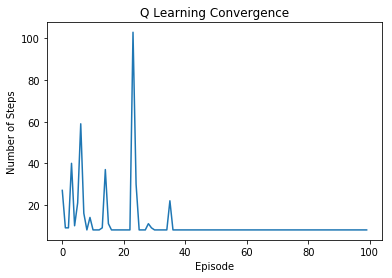

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
x = []
for i in range(100):
    x.append(i)
y = agent.steps
plt.plot(x,y)
plt.ylabel('Number of Steps')
plt.xlabel('Episode')
plt.title('Q Learning Convergence')
plt.show()

In [8]:
min(agent.steps)

8